<a href="https://colab.research.google.com/github/SunitaParajuli/Object-Localization-using-ResNet50-Adversial/blob/main/Object_Localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Object Localization using ResNet50
# Author: Sunita


In [ ]:
import numpy as np
from keras.applications.resnet50 import ResNet50
from foolbox.criteria import Misclassification, ConfidentMisclassification
from keras.preprocessing import image as img
from keras.applications.resnet50 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt
import foolbox
import pprint as pp
import keras
import pandas as pd
%matplotlib inline

Using TensorFlow backend.


In [ ]:
## Load image

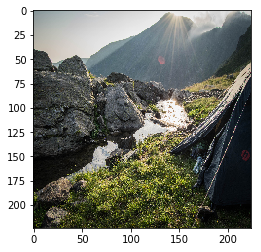

In [ ]:
def load_image(img_path: str):
  image = img.load_img(img_path, target_size=(224, 224))
  plt.imshow(image)
  x = img.img_to_array(image)
  return x

image = load_image('DSC_0897.jpg')

In [ ]:
## Attacking one image

In [ ]:
# instantiate model
keras.backend.set_learning_phase(0)
kmodel = ResNet50(weights='imagenet')
preprocessing = (np.array([104, 116, 123]), 1)
# create the foolbox model object from the Keras model
fmodel = foolbox.models.KerasModel(kmodel, bounds=(0, 255), preprocessing=preprocessing)

# We make the image (1, 224, 224, 3) so that it fits ResNet50
# which expects images for predictions to be in batches
to_classify = np.expand_dims(image, axis=0)
# We call predict and print the results
preds = kmodel.predict(to_classify)
print('Original predictions redicted:', pp.pprint(decode_predictions(preds, top=20)[0]), '\n')
# get the index of the highest number, as a label to be used later
label = np.argmax(preds)

# ::-1 reverses the color channels, because Keras ResNet50 expects BGR instead of RGB
image = image[:, :, ::-1]
# create the attack object, setting high misclassification criteria 
attack = foolbox.attacks.FGSM(fmodel, threshold=.9, criterion=ConfidentMisclassification(.9))
# apply attack on source image
adversarial = attack(image, label)

# get the new predictions on the advesarial image
new_preds = kmodel.predict(np.expand_dims(adversarial, axis=0))
print('Adversarial predictions:', pp.pprint(decode_predictions(new_preds, top=20)[0]))

[('n03792972', 'mountain_tent', 0.68727505),
 ('n09399592', 'promontory', 0.07355865),
 ('n09468604', 'valley', 0.07171795),
 ('n04606251', 'wreck', 0.025214558),
 ('n09428293', 'seashore', 0.018810693),
 ('n01498041', 'stingray', 0.01020383),
 ('n04366367', 'suspension_bridge', 0.00910297),
 ('n02077923', 'sea_lion', 0.008893944),
 ('n09472597', 'volcano', 0.0077157747),
 ('n09421951', 'sandbar', 0.0056634448),
 ('n09193705', 'alp', 0.0052817613),
 ('n09256479', 'coral_reef', 0.005070684),
 ('n03042490', 'cliff_dwelling', 0.0048538684),
 ('n03788365', 'mosquito_net', 0.0040941825),
 ('n03450230', 'gown', 0.003981212),
 ('n09246464', 'cliff', 0.0034005924),
 ('n04507155', 'umbrella', 0.00259821),
 ('n09332890', 'lakeside', 0.0024168892),
 ('n02951358', 'canoe', 0.0020540736),
 ('n03160309', 'dam', 0.0020333952)]
Original predictions redicted: None 

[('n09472597', 'volcano', 0.5914125),
 ('n04366367', 'suspension_bridge', 0.16848682),
 ('n09468604', 'valley', 0.08690361),
 ('n03792972'

In [ ]:
## Side-by-side comparison

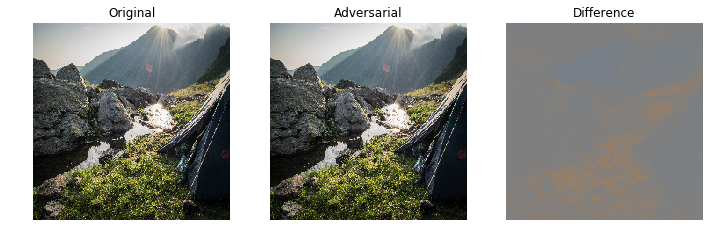

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image[:,:,::-1] / 255)  # division by 255 to convert [0, 255] to [0, 1]
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Adversarial')
plt.imshow(adversarial[:, :, ::-1] / 255)  # ::-1 to convert BGR to RGB
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Difference')
difference = adversarial[:, :, ::-1] - image
plt.imshow(difference / abs(difference).max() * 0.2 + 0.5)
plt.axis('off')

plt.show()